## Import modules

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
snp_gen = pd.read_csv("https://www.dropbox.com/s/p2ef992kl2jmmis/matrix_1kg.txt?dl=1"
                     , sep = '\t')

In [4]:
snp_gen[:10]

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,chr21,24504037,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,chr21,14465625,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,chr21,18700688,C,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,chr21,16641027,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,chr21,41379506,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Alternate allele frequency

"Alternate allele frequency" for each SNP is defined as the total number of counts of alternate alleles divided by the total number of chromosomes in the population (i.e., the number of samples x 2).

In [35]:
#the total counts of alternate alleles is defined as sum_f
sum_f = snp_gen.iloc[:, 4:].sum(axis = 1)

#alternate allele frequency is defined as alf
alf = sum_f/(len(snp_gen.index)*2)

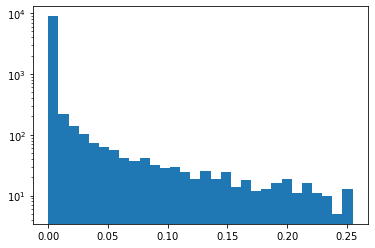

In [75]:
#show the frequency distribution of the aternate allele frequency
fix, ax = plt.subplots()
ax.hist(alf, bins = 30)
ax.set_yscale('log')
plt.show()

## Subset the data frame to "common variation"

In [53]:
#row of interests are those SNPs with alf between 0.05 and 0.95
roi = (alf >= 0.05) & (alf <= 0.95)

In [56]:
snp_gen = snp_gen.loc[roi, : ]

In [57]:
snp_gen

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
32,chr21,37584553,T,C,1,2,1,1,1,1,...,1,1,2,0,0,0,1,1,1,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
54,chr21,40591784,A,G,0,1,1,1,2,0,...,1,0,2,1,2,0,0,0,2,2
98,chr21,16916953,T,A,2,1,2,0,0,0,...,2,0,1,0,1,0,1,2,0,0
107,chr21,31094837,C,G,1,1,1,2,0,0,...,0,2,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9913,chr21,19646151,T,A,0,0,1,1,1,0,...,2,1,1,1,1,0,0,1,0,1
9927,chr21,18393571,A,G,0,1,0,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9929,chr21,45308368,G,A,2,0,1,1,2,0,...,1,0,0,1,1,2,2,0,1,1
9957,chr21,40748951,T,C,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,2


## Principle Component Analysis

In [90]:
#only include numerical columns
pca_input = snp_gen.iloc[:, 4:]

#we are interested in the diff/sim across samples based on genotype, so transpose the data frame
pca_input = pca_input.transpose()


In [91]:
pca_input

,32,38,54,98,107,116,128,135,139,164,...,9837,9841,9846,9847,9873,9913,9927,9929,9957,9975
HG00096,1,0,0,2,1,2,0,0,0,0,...,2,1,2,1,0,0,0,2,1,2
HG00097,2,1,1,1,1,1,2,0,1,1,...,2,2,2,2,1,0,1,0,2,1
HG00099,1,2,1,2,1,1,0,1,0,1,...,2,2,2,2,2,1,0,1,2,0
HG00100,1,1,1,0,2,0,2,0,1,0,...,0,1,2,1,2,1,0,1,2,1
HG00101,1,1,2,0,0,2,1,1,0,1,...,2,2,2,1,2,1,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,1,0,0,1,1,0,1,1,2,...,2,2,2,2,1,0,2,2,2,1
NA21141,1,1,0,1,1,1,1,1,0,1,...,1,2,2,1,2,0,0,2,2,2
NA21142,1,2,0,2,0,1,0,0,0,1,...,1,1,2,1,1,1,1,0,2,2
NA21143,1,0,2,0,1,1,0,0,0,2,...,0,2,2,0,2,0,1,1,1,2


In [92]:
#standardize the pca input
pca_input_standardized = StandardScaler().fit_transform(pca_input)

In [93]:
#perform PCA
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)

In [94]:
pca_output

array([[-4.07639798, -7.92389722, -1.76897234, ..., -1.76147391,
         4.63584396,  2.88374461],
       [-4.10203421, -6.70527329,  2.49364251, ...,  3.80757298,
         2.41679803, -1.29760005],
       [-3.62681455, -7.19284236, -1.18893394, ..., -2.54252473,
        -2.14890766,  0.26353884],
       ...,
       [-2.93965621, -2.90639838, -4.47075169, ...,  1.7475297 ,
        -3.52577788,  0.71000761],
       [-4.81276647, -1.82445397, -1.03664945, ...,  0.61731099,
        -3.69890891, -2.62087006],
       [-1.00064506,  0.09263838, -3.23731034, ...,  3.5924707 ,
        -1.08958913,  1.07088283]])

In [95]:
#make the pca output into a dataframe
pca_output_df = pd.DataFrame(data = pca_output,
            columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6",
                      "PC7", "PC8", "PC9", "PC10"])


## Plot PCA

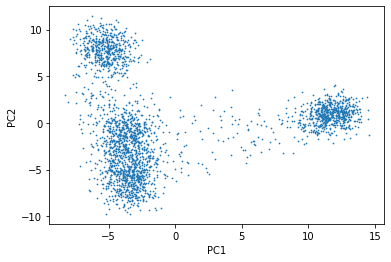

In [102]:
fix, ax = plt.subplots()
ax.scatter(x = pca_output_df["PC1"], y = pca_output_df["PC2"], s = 0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

plt.show() 

# Advanced exercise

##  Question 5 Merge PCA output df with meta data df

In [109]:
#read meta data df
meta_df = pd.read_csv("ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel",
                     sep = '\t')

In [110]:
meta_df

,sample,pop,super_pop,gender,Unnamed: 4,Unnamed: 5
0,HG00096,GBR,EUR,male,NaN,NaN
1,HG00097,GBR,EUR,female,NaN,NaN
2,HG00099,GBR,EUR,female,NaN,NaN
3,HG00100,GBR,EUR,female,NaN,NaN
4,HG00101,GBR,EUR,male,NaN,NaN
...,...,...,...,...,...,...
2499,NA21137,GIH,SAS,female,NaN,NaN
2500,NA21141,GIH,SAS,female,NaN,NaN
2501,NA21142,GIH,SAS,female,NaN,NaN
2502,NA21143,GIH,SAS,female,NaN,NaN


In [111]:
#modify the meta df so that the last two columns are dropped

meta_df = meta_df.drop(columns = ["Unnamed: 4", "Unnamed: 5"])


In [112]:
meta_df

,sample,pop,super_pop,gender
0,HG00096,GBR,EUR,male
1,HG00097,GBR,EUR,female
2,HG00099,GBR,EUR,female
3,HG00100,GBR,EUR,female
4,HG00101,GBR,EUR,male
...,...,...,...,...
2499,NA21137,GIH,SAS,female
2500,NA21141,GIH,SAS,female
2501,NA21142,GIH,SAS,female
2502,NA21143,GIH,SAS,female


In [99]:
#Get the index of the samples from the pca input. Note the column name should be same
pca_output_df["sample"] = pca_input.index
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-4.076398,-7.923897,-1.768972,-2.593077,-4.137448,0.469548,-0.645979,-1.761474,4.635844,2.883745,HG00096
1,-4.102034,-6.705273,2.493643,-3.219924,-2.423237,-1.833283,3.562026,3.807573,2.416798,-1.297600,HG00097
2,-3.626815,-7.192842,-1.188934,-0.397868,-2.618793,3.370852,-1.588599,-2.542525,-2.148908,0.263539,HG00099
3,-3.199779,-5.562442,0.630767,-6.168755,0.421525,0.740959,-1.195545,-3.632639,1.240022,-0.929992,HG00100
4,-4.683040,-6.917048,3.291891,2.233094,-3.126246,0.073690,-2.387260,-0.117900,-2.813139,2.982823,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-5.201166,0.185552,-2.243859,2.919943,1.821146,-0.169438,0.304372,-1.096599,1.553938,0.599573,NA21137
2544,-5.302092,-3.191894,-5.818232,1.205398,3.740033,2.693897,-3.647445,0.095799,-0.243133,-0.031265,NA21141
2545,-2.939656,-2.906398,-4.470752,1.974554,1.970996,-0.049119,1.268647,1.747530,-3.525778,0.710008,NA21142
2546,-4.812766,-1.824454,-1.036649,5.488659,-0.415508,-2.945096,0.335030,0.617311,-3.698909,-2.620870,NA21143


In [114]:
#modify the meta 
pca_output_df = meta_df.merge(pca_output_df, on = "sample")

In [115]:
pca_output_df

,sample,pop,super_pop,gender,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,HG00096,GBR,EUR,male,-4.076398,-7.923897,-1.768972,-2.593077,-4.137448,0.469548,-0.645979,-1.761474,4.635844,2.883745
1,HG00097,GBR,EUR,female,-4.102034,-6.705273,2.493643,-3.219924,-2.423237,-1.833283,3.562026,3.807573,2.416798,-1.297600
2,HG00099,GBR,EUR,female,-3.626815,-7.192842,-1.188934,-0.397868,-2.618793,3.370852,-1.588599,-2.542525,-2.148908,0.263539
3,HG00100,GBR,EUR,female,-3.199779,-5.562442,0.630767,-6.168755,0.421525,0.740959,-1.195545,-3.632639,1.240022,-0.929992
4,HG00101,GBR,EUR,male,-4.683040,-6.917048,3.291891,2.233094,-3.126246,0.073690,-2.387260,-0.117900,-2.813139,2.982823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,NA21137,GIH,SAS,female,-5.201166,0.185552,-2.243859,2.919943,1.821146,-0.169438,0.304372,-1.096599,1.553938,0.599573
2499,NA21141,GIH,SAS,female,-5.302092,-3.191894,-5.818232,1.205398,3.740033,2.693897,-3.647445,0.095799,-0.243133,-0.031265
2500,NA21142,GIH,SAS,female,-2.939656,-2.906398,-4.470752,1.974554,1.970996,-0.049119,1.268647,1.747530,-3.525778,0.710008
2501,NA21143,GIH,SAS,female,-4.812766,-1.824454,-1.036649,5.488659,-0.415508,-2.945096,0.335030,0.617311,-3.698909,-2.620870


## Question 6

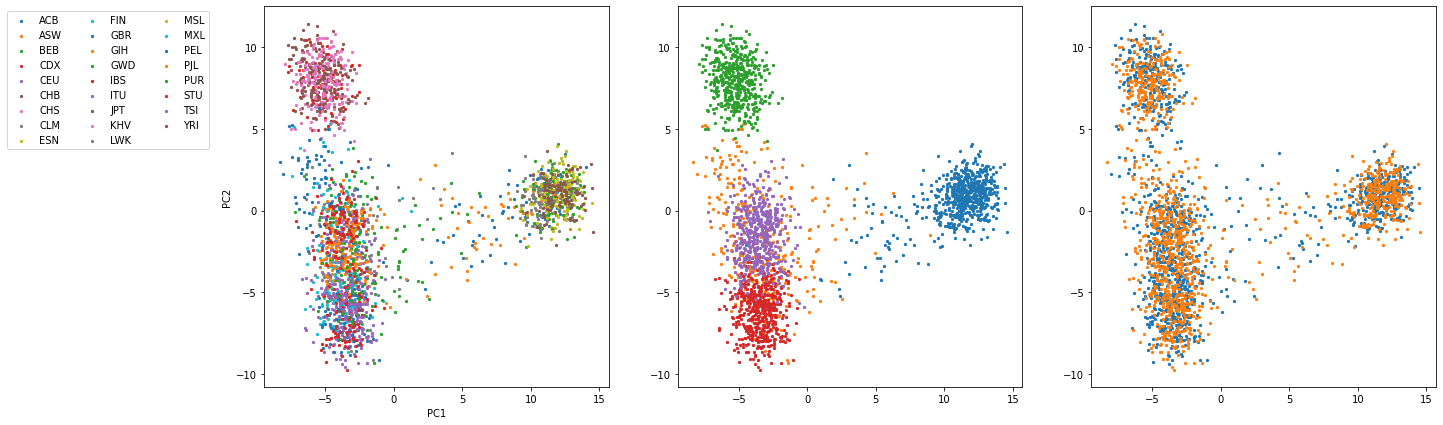

In [147]:
fig, axes = plt.subplots(1,3, figsize = [21,7])
pop = pca_output_df.groupby("pop")

super_pop = pca_output_df.groupby("super_pop")

gender = pca_output_df.groupby("gender")


for name, group in pop:
    axes[0].scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)

axes[0].legend(bbox_to_anchor = (-0.76,1), loc = "upper left", ncol = 3)
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")


for name, group in super_pop:
    axes[1].scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)
    
for name, group in gender:
    axes[2].scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)


plt.show()

Text(0, 0.5, 'PC2')

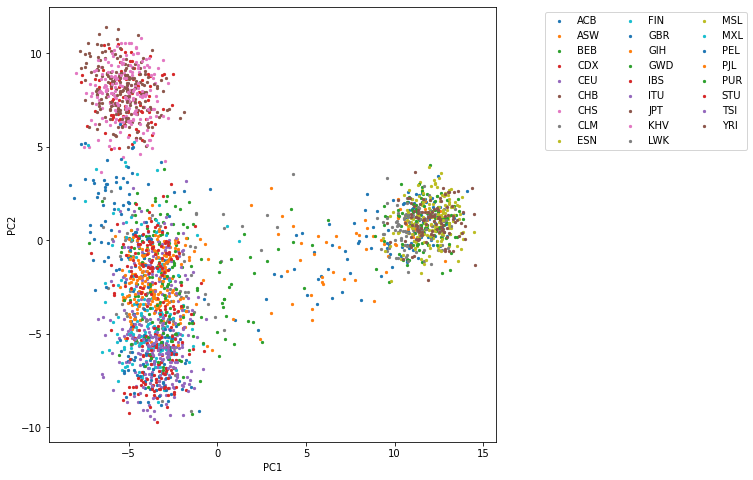

In [153]:
fig, ax = plt.subplots(figsize = (8,8))
pop = pca_output_df.groupby("pop")

for name, group in pop:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)

ax.legend(bbox_to_anchor = (1.1,1), loc = "upper left", ncol = 3)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


Text(0, 0.5, 'PC2')

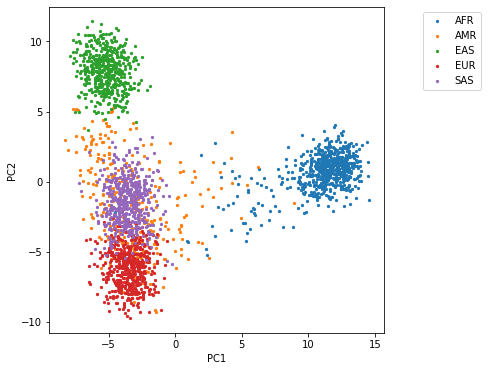

In [157]:
fig, ax = plt.subplots(figsize = (6,6))
super_pop = pca_output_df.groupby("super_pop")

for name, group in super_pop:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)

ax.legend(bbox_to_anchor = (1.1,1), loc = "upper left", ncol = 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

Text(0, 0.5, 'PC2')

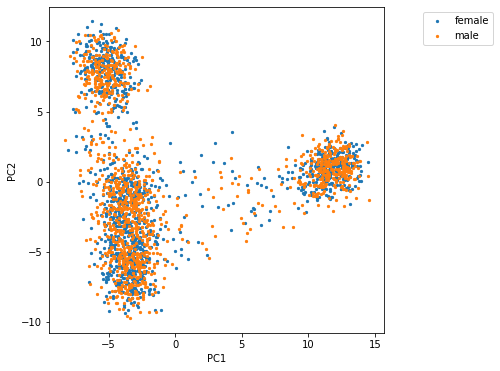

In [158]:
fig, ax = plt.subplots(figsize = (6,6))
gender = pca_output_df.groupby("gender")

for name, group in gender:
    ax.scatter(x = group["PC1"], y = group["PC2"], label = name, s = 5)

ax.legend(bbox_to_anchor = (1.1,1), loc = "upper left", ncol = 1)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

## Question 7 3D plots

In [160]:
#import 3D plot package
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'PC3')

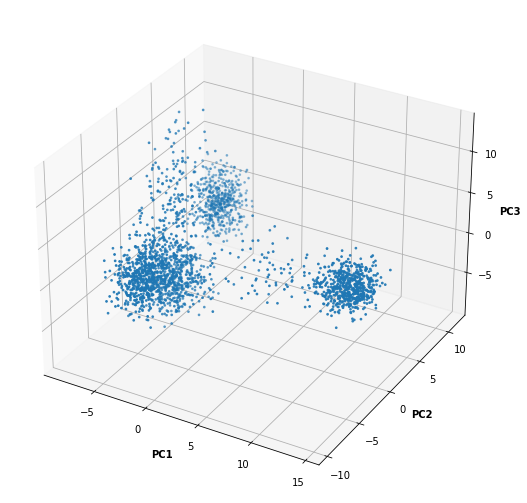

In [176]:
#set x-, y- ,z- axes
x = pca_output_df["PC1"]
y = pca_output_df["PC2"]
z = pca_output_df["PC3"]

#create the figure
fig = plt.figure(figsize = [9,9])
ax = plt.axes(projection ="3d")

#create the plot

ax.scatter3D(x, y, z, s = 3)

ax.set_xlabel('PC1', fontweight ='bold')
ax.set_ylabel('PC2', fontweight ='bold')
ax.set_zlabel('PC3', fontweight ='bold')
